In [38]:
import pandas as pd
from glob import glob

# Old dataset

In [137]:
cnt = pd.DataFrame()
for file in glob('../calibS-1/*.txt'):
  print(file)
  cnt = pd.concat([cnt,pd.read_csv(file,sep=' ', header=None,index_col=0)],axis=1)

../calibS-1/Joints.txt
../calibS-1/GearTorque.txt
../calibS-1/MeasuredPositionsLeica.txt
../calibS-1/MeasuredPositionsTS_Model.txt
../calibS-1/RobotPositions.txt
../calibS-1/DriveTorque.txt


In [144]:
cnt.columns=range(cnt.shape[1])
cnt

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,,,,,,,,,,,,,,,,,,,,,
0,94.429290,-53.369570,67.849075,4.676737,17.413774,-15.608587,0.000000,0.00000,0.0000,0.000000,...,1257.782997,-93.431758,1.529676,176.695513,0.003898,0.054700,0.011997,-0.004777,-0.002837,0.011410
1,91.151010,-52.101610,66.189760,48.378105,27.118320,-67.453530,0.000000,0.00000,0.0000,0.000000,...,1257.630117,-111.705106,0.419940,176.379760,-0.019028,-0.044321,-0.028385,-0.010518,0.000923,-0.017298
2,100.432630,-48.472008,59.058144,-52.297527,44.670227,56.954082,0.000000,0.00000,0.0000,0.000000,...,1258.022590,-56.795023,3.190011,178.263949,0.012725,-0.079608,0.004819,-0.009465,-0.006079,-0.009087
3,94.012840,-23.638317,6.143470,4.788668,91.820900,-16.738571,0.000000,0.00000,0.0000,0.000000,...,1257.803445,-100.632358,43.634065,175.310833,0.016779,0.017424,0.016787,-0.008514,-0.006572,0.010218
4,94.148890,-49.696484,88.087010,177.040050,57.309727,-188.652970,0.000000,0.00000,0.0000,0.000000,...,1257.542306,-93.468308,-49.139862,174.807088,-0.014005,0.021922,-0.021295,0.000226,-0.008891,0.011471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,117.175705,-59.779903,79.798630,-50.830210,18.732674,45.713800,63.593830,430.05590,-3398.1540,-281.328430,...,1228.093930,-98.760830,0.602824,178.536476,0.234641,-1.610079,11.831888,1.083975,0.181235,-0.071973
137,115.867810,-49.201378,54.996130,-14.165884,57.914726,18.896187,-201.595750,455.70108,-2695.3164,17.449604,...,1228.183461,-88.123909,30.195346,178.486122,-0.744513,-1.705536,9.381756,-0.065240,0.433556,-0.182495
138,121.332405,-58.264240,89.268166,-121.737330,39.902344,119.729770,-492.210240,383.26523,-2325.7795,-61.595394,...,1228.140355,-86.785652,-24.321984,178.561696,-1.841692,-1.438289,8.074601,0.228589,-0.118709,0.732410


In [139]:
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(
    cnt,
    test_size=0.3,          # Доля тестовой выборки (30%)
    random_state=42,        # Фиксируем случайность для воспроизводимости
    shuffle=True            # Перемешивание данных перед разбиением (по умолчанию True)
)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (98, 36)
Test shape: (42, 36)


In [140]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_df.loc[:,0:18], train_df.loc[:,18:23])  # y_train имеет форму (n_samples, 3)

LinearRegression()

In [141]:
predictions = model.predict(test_df.loc[:,0:18])

In [142]:
test_df.loc[:,:].head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,,,,,,,,,,,,,,,,,,,,,
108,61.806920,-53.104763,62.363480,9.456014,62.495102,-37.666634,187.07207,316.40353,-2521.4710,-62.423813,...,1188.704536,-82.892005,39.363703,178.567493,0.693030,-1.184996,8.768266,0.238716,0.518605,0.341370
67,128.384100,-41.006990,59.314450,-2.492036,67.046580,24.707090,0.00000,0.00000,0.0000,0.000000,...,811.591971,-90.666548,54.479548,179.173165,-0.021012,-0.061592,-0.021535,-0.009224,0.000468,-0.012845
31,80.176704,-41.278110,91.722790,166.641190,42.064120,-179.440020,0.00000,0.00000,0.0000,0.000000,...,635.926350,-85.183716,-21.082574,173.201796,-0.009484,0.026438,0.021700,-0.007998,-0.005395,0.010140
119,105.344990,-78.129930,111.939130,-85.528810,10.253825,81.599320,828.07970,-1536.53980,-2413.3242,-88.328210,...,1086.994272,-90.639317,3.660024,177.254659,3.043804,5.744670,8.396720,0.336079,-1.172295,-0.731475
42,114.573320,-40.498665,33.105347,-25.976200,48.153755,20.032925,0.00000,0.00000,0.0000,0.000000,...,1513.490501,-89.278699,4.944868,178.392713,-0.004936,0.048920,0.018865,0.001289,-0.002646,-0.017048


In [143]:
predictions[0]

array([ 535.92726826,  -50.53532288, 1990.55812042,  -40.59537785,
         -3.12755608,   30.20893451])

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
mean_absolute_error(test_df.loc[:,18:23],predictions)

16.387967276919284

In [58]:
mean_squared_error(test_df.loc[:,18:23],predictions)

1810.6992396659746

In [59]:
r2_score(test_df.loc[:,18:23],predictions)

0.9197681950407818

In [60]:
corr_matrix = cnt.corr()

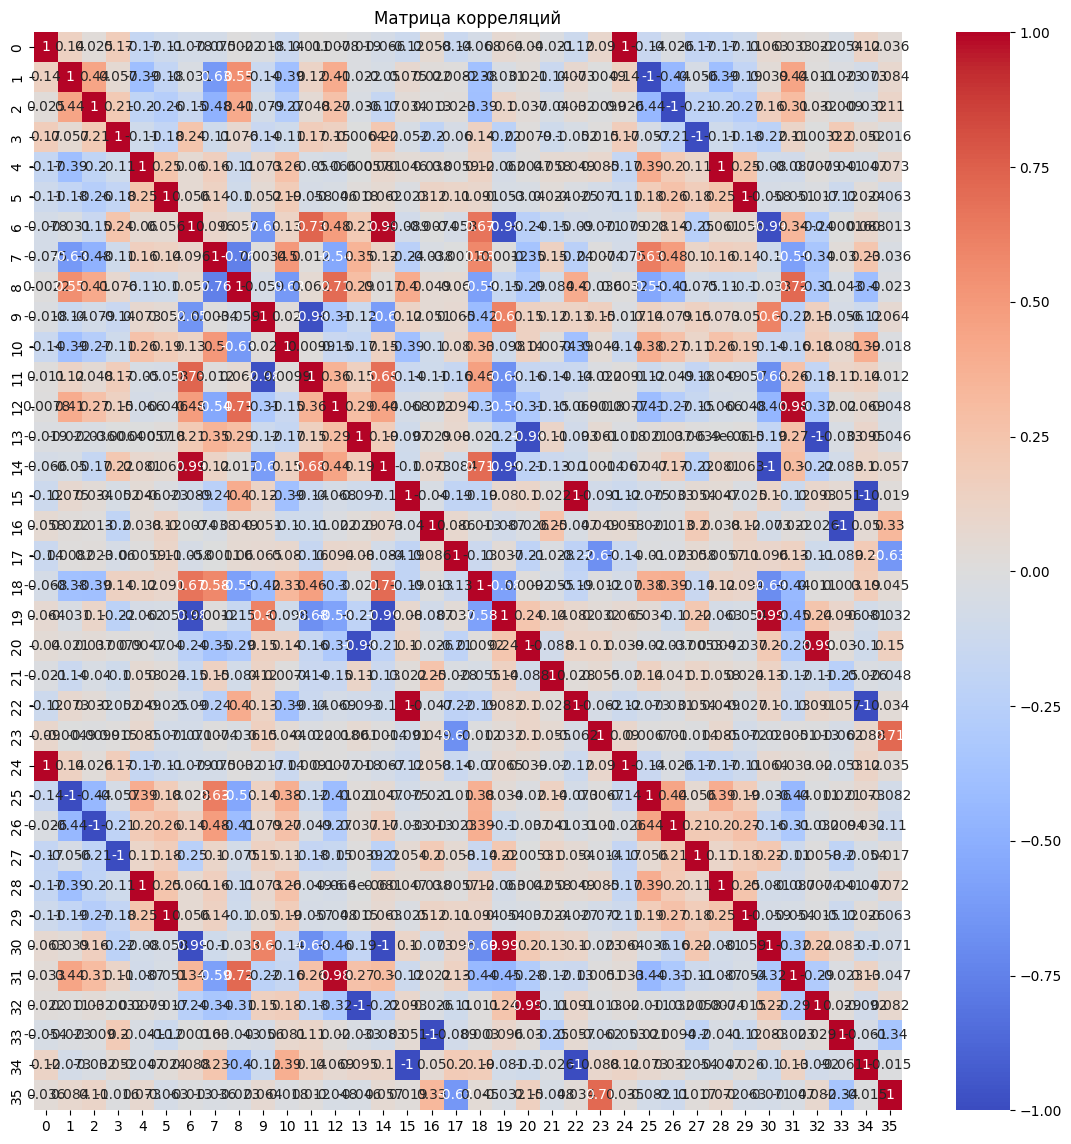

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Матрица корреляций")
plt.show()

# New  dataset

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def load_points(filename):
    """Загрузка данных из файла с обработкой BOM и разделителей"""
    # Читаем файл как текст, удаляем BOM, затем загружаем в numpy
    with open(filename, 'r', encoding='utf-8-sig') as f:  # utf-8-sig удаляет BOM
        data = np.loadtxt(f, delimiter=None)  # None - автоматическое определение разделителя
    
    positions = data[:, 1:4]  # X, Y, Z
    orientations = data[:, 4:7]  # RZ, RY, RX
    return positions, orientations

def visualize_points(positions, orientations, scale=0.1):
    """Визуализация точек с ориентацией"""
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Отображаем точки
    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='b', s=10, label='Точки')
    
    # Отображаем ориентацию (векторы)
    for pos, ori in zip(positions, orientations):
        # Преобразуем углы Эйлера в вектор направления
        # (упрощенное представление - можно использовать матрицы поворота для точности)
        rx, ry, rz = ori
        dx = np.cos(rz) * np.cos(ry) * scale
        dy = np.sin(rz) * np.cos(ry) * scale
        dz = np.sin(ry) * scale
        
        ax.quiver(pos[0], pos[1], pos[2], dx, dy, dz, color='r', length=scale, normalize=True)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Облако ориентированных точек')
    ax.legend()
    plt.show()

# Пример использования
if __name__ == "__main__":
    # Замените 'your_file.txt' на путь к вашему файлу
    positions, orientations = load_points('../data//RobotPositions.txt')
    # visualize_points(positions, orientations)


    mesured_positions, mesured_orientations = load_points('../data/AviaStar_TestNormalizeModelV5/MeasuredPositionsTS_ModelForestNewV5.txt')
    # visualize_points(mesured_positions, mesured_orientations)


FileNotFoundError: [Errno 2] No such file or directory: '../data//RobotPositions.txt'

In [ ]:
import pandas as pd
import os
from tqdm import tqdm

def combine_files_with_index_check(folders, target_files, output_file=None):
    """
    Объединяет файлы с проверкой индексов
    
    Параметры:
    - folders: список путей к папкам
    - target_files: имена файлов ['DriveTorque.txt', 'GearTorque.txt', 'Joints.txt']
    - output_file: путь для сохранения (опционально)
    
    Возвращает:
    - Объединенный датафрейм (19 колонок)
    """
    
    # Результирующий датафрейм
    final_df = pd.DataFrame()
    stats = {'total_folders': 0, 'processed_folders': 0, 'errors': 0}
    
    print(f"Обработка {len(folders)} папок...")
    
    for folder in tqdm(folders):
        stats['total_folders'] += 1
        folder_data = {}
        index_ref = None
        valid_folder = True
        
        # Сначала загружаем все файлы из папки и проверяем индексы
        for file_name in target_files:
            file_path = os.path.join(folder, file_name)
            
            try:
                if os.path.exists(file_path):
                    # Чтение файла (7 колонок: индекс + 6 данных)
                    df = pd.read_csv(file_path, sep=' ', header=None, engine='python')
                    
                    # Проверка структуры файла
                    if len(df.columns) != 7:
                        print(f"\nОшибка в {file_path}: ожидается 7 колонок, получено {len(df.columns)}")
                        valid_folder = False
                        break
                        
                    # Устанавливаем индекс (первая колонка)
                    df = df.set_index(0)
                    
                    # Проверка совпадения индексов между файлами
                    if index_ref is None:
                        index_ref = df.index
                    elif not index_ref.equals(df.index):
                        print(f"\nНесовпадение индексов в {file_path}")
                        valid_folder = False
                        break
                        
                    folder_data[file_name] = df
                    
            except Exception as e:
                print(f"\nОшибка чтения {file_path}: {str(e)}")
                valid_folder = False
                break
        
        # Если все файлы загружены и индексы совпадают
        if valid_folder and len(folder_data) == len(target_files):
            try:
                # Горизонтальное объединение (6 колонок из каждого файла)
                combined = pd.concat([
                    # folder_data['DriveTorque.txt'],
                    folder_data['GearTorque.txt'],
                    folder_data['Joints.txt'],
                    folder_data['RobotPositions.txt'],
                    folder_data['MeasuredPositionsLeica.txt']
                ], axis=1)
                
                # Проверка количества колонок (5 файла × 6 колонок = 30)
                # if len(combined.columns) != 30:
                #     print(f"\nНеверное количество колонок в {folder}: {len(combined.columns)}")
                #     stats['errors'] += 1
                #     continue
                
                # Добавляем метку папки (19-я колонка)
                # combined['source_folder'] = os.path.basename(folder.rstrip('/'))
                
                # Добавляем к итоговому датафрейму
                final_df = pd.concat([final_df, combined], axis=0)
                stats['processed_folders'] += 1
                
            except Exception as e:
                print(f"\nОшибка объединения в {folder}: {str(e)}")
                stats['errors'] += 1
    
    # Генерация имен колонок
    if not final_df.empty:
        column_names = (
            # [f'DriveTorque_{i}' for i in range(1, 7)] +
            [f'GearTorque_{i}' for i in range(1, 7)] +
            [f'Joints_{i}' for i in range(1, 7)] +
            [f'RobotPositions_{i}' for i in range(1, 7)] +
            [f'MeasuredPositionsLeica_{i}' for i in range(1, 7)]
            # +['source_folder']
        )
        
        final_df.columns = column_names
        
        # Сохранение
        if output_file:
            try:
                final_df.to_csv(output_file, index=True)
                print(f"\nРезультат сохранен в {output_file}")
            except Exception as e:
                print(f"\nОшибка сохранения: {str(e)}")
    
    # Статистика
    print("\nСтатистика:")
    print(f"Успешно обработано папок: {stats['processed_folders']}/{stats['total_folders']}")
    print(f"Ошибок: {stats['errors']}")
    print(f"Итоговый размер: {final_df.shape} (ожидается 31 колонок)")
    
    return final_df

# Конфигурация
target_files = ['GearTorque.txt', 'Joints.txt', 'RobotPositions.txt', 'MeasuredPositionsLeica.txt']
folders = [
    # '../calibS-1/'
    '../data/collect800Points100-20-110/'
    # '../data/calibF/',
    # '../data/robLocate/',
    # '../data/spiraltestS/'
]

# Запуск обработки
result = combine_files_with_index_check(
    folders=folders,
    target_files=target_files,
    output_file='combined_results.csv'
)




Обработка 1 папок...


100%|██████████| 1/1 [00:00<00:00, 12.35it/s]


Результат сохранен в combined_results.csv

Статистика:
Успешно обработано папок: 1/1
Ошибок: 0
Итоговый размер: (140, 24) (ожидается 31 колонок)


In [184]:
result2 = result.drop(result.columns[-6:],axis=1)
result2 = result2.drop(['RobotPositions_4','RobotPositions_5'],axis=1)

In [149]:
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(
    result2,
    test_size=0.3,          # Доля тестовой выборки (30%)
    random_state=42,        # Фиксируем случайность для воспроизводимости
    shuffle=True            # Перемешивание данных перед разбиением (по умолчанию True)
)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (98, 16)
Test shape: (42, 16)


In [186]:
from sklearn.linear_model import LinearRegression

X_train = train_df.loc[:, :'Joints_6']  # Признаки (колонки 0-17)
y_train = train_df.loc[:, 'RobotPositions_1':]  # Целевые (колонки 18-23)
X_test = test_df.loc[:, :'Joints_6'] 
y_test = test_df.loc[:, 'RobotPositions_1':]

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [164]:
from sklearn.linear_model import Lasso

X_train = train_df.iloc[:, :11]
y_train = train_df.iloc[:, 12:17]

X_test = test_df.iloc[:, :11]
y_test = test_df.iloc[:, 12:17]

model = Lasso()
model.fit(X_train, y_train)

Lasso()

In [155]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"R² score на тренировочных данных: {train_score:.3f}")
print(f"R² score на тестовых данных: {test_score:.3f}")

R² score на тренировочных данных: 0.748
R² score на тестовых данных: 0.635


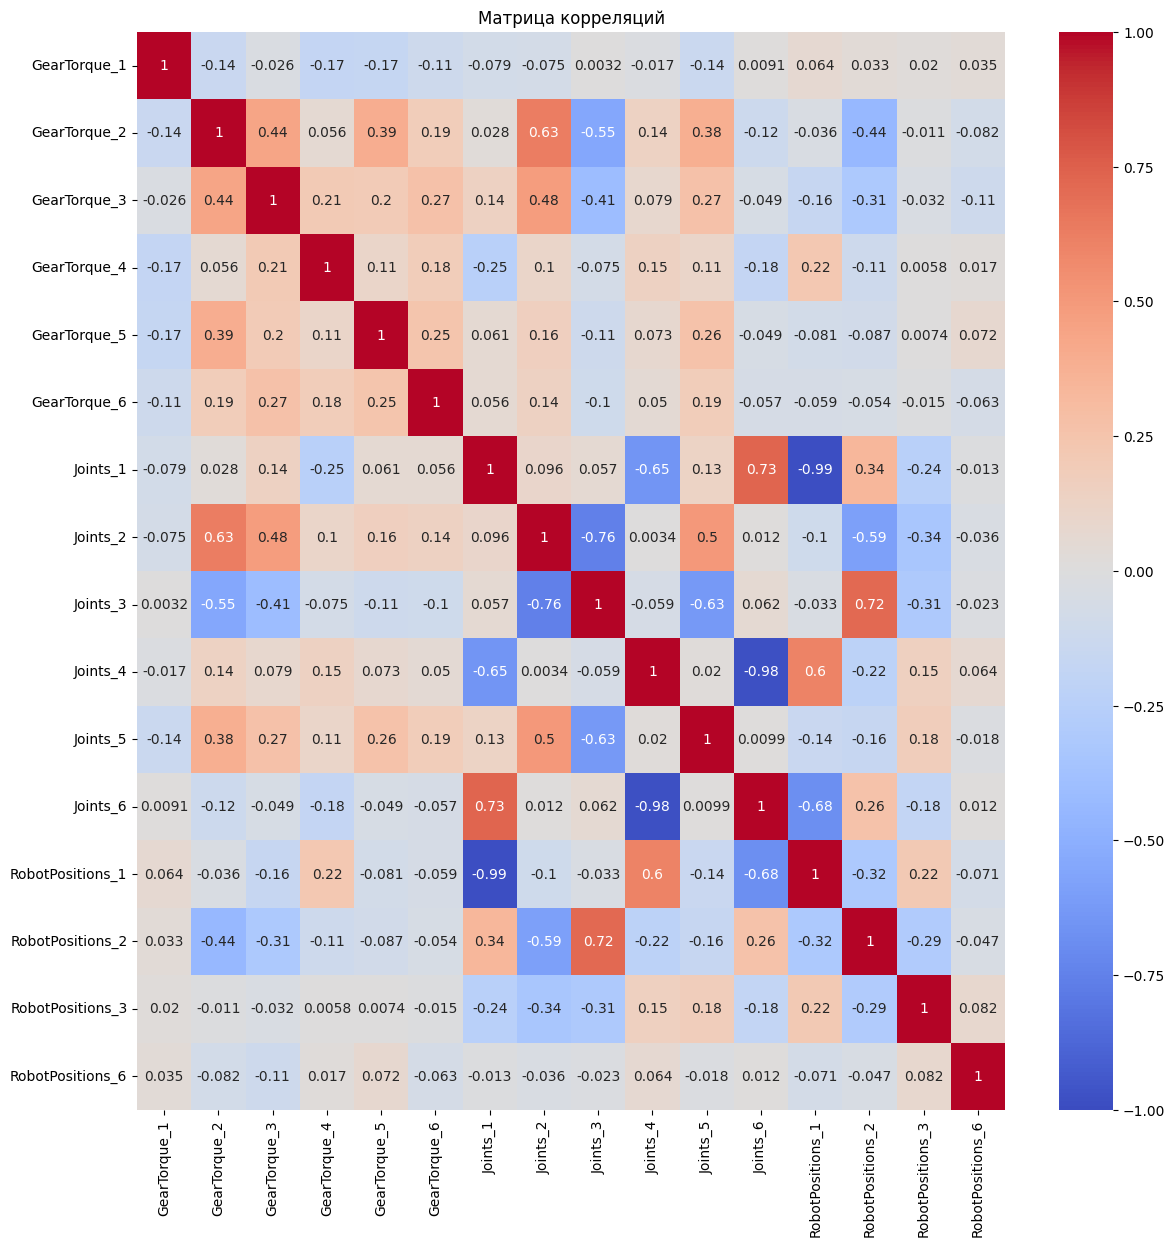

In [153]:

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = result2.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Матрица корреляций")
plt.show()

In [169]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split

class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(12, 64)   # Входной слой: 6 -> 64 нейрона
        self.fc2 = nn.Linear(64, 32)  # Скрытый слой: 64 -> 32 нейрона
        self.fc3 = nn.Linear(32, 4)   # Выходной слой: 32 -> 3 нейрона (x, y, z)

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Активация ReLU после первого слоя
        x = F.relu(self.fc2(x))  # Активация ReLU после второго слоя
        x = self.fc3(x)          # Выходной слой без активации
        return x

# Пример создания модели
model = SimpleModel()

In [187]:
X_train.head()

,GearTorque_1,GearTorque_2,GearTorque_3,GearTorque_4,GearTorque_5,GearTorque_6,Joints_1,Joints_2,Joints_3,Joints_4,Joints_5,Joints_6
0,,,,,,,,,,,,
40,0.00000,0.00000,0.0000,0.00000,0.00000,0.000000,114.663200,-47.316574,62.874527,-59.017372,40.408787,29.100910
24,0.00000,0.00000,0.0000,0.00000,0.00000,0.000000,72.202870,-81.322190,95.309730,104.323740,14.519601,-121.492990
93,0.00000,0.00000,0.0000,0.00000,0.00000,0.000000,79.227850,-55.037434,50.901010,-18.322502,38.007954,9.481160
127,886.06384,-492.18768,-3333.8787,-252.53564,148.62352,-58.246315,101.053535,-74.836580,101.025536,-33.688470,9.540675,25.529177
112,293.14380,-2218.11670,-2291.1765,-197.02953,236.64796,-140.511720,91.578460,-87.325775,116.003654,-62.141495,7.877555,53.454285


In [188]:
criterion = nn.MSELoss()  # Функция потерь MSE
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Оптимизатор Adam
num_epochs = 50  # Количество эпох

In [189]:
train_data = TensorDataset(torch.FloatTensor(X_train.to_numpy()), torch.FloatTensor(y_train.to_numpy()))
test_data = TensorDataset(torch.FloatTensor(X_test.to_numpy()), torch.FloatTensor(y_test.to_numpy()))

# Создание DataLoader
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [179]:
test_data

In [190]:
for epoch in range(num_epochs):
    model.train()  # Режим обучения
    running_loss = 0.0
    
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Обнуляем градиенты
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # Backward pass и оптимизация
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
    
    # Вывод статистики
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

Epoch 1/50, Loss: 2226754.3214
Epoch 2/50, Loss: 2200606.4133
Epoch 3/50, Loss: 2175097.1071
Epoch 4/50, Loss: 2147380.0944
Epoch 5/50, Loss: 2114783.9643
Epoch 6/50, Loss: 2083463.4031
Epoch 7/50, Loss: 2042862.1735
Epoch 8/50, Loss: 1997895.3316
Epoch 9/50, Loss: 1943532.7500
Epoch 10/50, Loss: 1883443.4107
Epoch 11/50, Loss: 1820942.2245
Epoch 12/50, Loss: 1755715.8163
Epoch 13/50, Loss: 1697162.3980
Epoch 14/50, Loss: 1643204.0663
Epoch 15/50, Loss: 1595586.7449
Epoch 16/50, Loss: 1557271.8265
Epoch 17/50, Loss: 1525035.7857
Epoch 18/50, Loss: 1494921.0440
Epoch 19/50, Loss: 1465347.8699
Epoch 20/50, Loss: 1432795.1122
Epoch 21/50, Loss: 1398113.1454
Epoch 22/50, Loss: 1361636.4923
Epoch 23/50, Loss: 1323096.7781
Epoch 24/50, Loss: 1278948.2679
Epoch 25/50, Loss: 1233083.3712
Epoch 26/50, Loss: 1183259.0625
Epoch 27/50, Loss: 1132675.0714
Epoch 28/50, Loss: 1078827.4515
Epoch 29/50, Loss: 1022402.6505
Epoch 30/50, Loss: 963901.7526
Epoch 31/50, Loss: 904583.0204
Epoch 32/50, Loss: 